In [2]:
import json
import sys
import glob
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown

In [4]:
DIR = "/home/claudio/hdd/git/bachelorThesis/table_iii/"

In [5]:
NAMES = {-1: "No termination", 0: "SUBMIT", 1: "QUEUE", 2: "ENABLE", 
          3: "SCHEDULE", 4: "EVICT", 5: "FAIL", 6: "FINISH",
          7: "KILL", 8: "LOST", 9: "UPDATE_PENDING", 10: "UPDATE_RUNNING"}

def rename(df, new, old):
    df.rename(columns={old: new}, inplace=True)

In [28]:
display(Markdown("# Table III"))
for cluster in list("abcdefgh") + ["all"]:
    df = pd.read_csv(glob.glob(DIR + "/table-iii-" + cluster + ".csv/part-00000-*")[0])
    df = df[df["task_term"].isin(range(4,8))]
    df = df.sort_values("task_term")
    df["mean"] = df["mean"].round(3).apply(lambda x: "%.03f" % x) + " (" + df["%95"].apply(lambda x: "%d" % x) + ")"
    rename(df, "# Evts. mean (95-th percentile)", "mean")
    del df["%95"]
    
    for i in [4,5,6,7]:
        df.loc[df.task_term == i, "task_term"] = NAMES[i]
        df["avg_count_%d" % i] = df["avg_count_%d" % i].round(3)
        rename(df, "mean # " + NAMES[i] + " evts.", "avg_count_" + str(i))
    for i in [0,1,2,3,8,9,10]:
        del df["avg_count_" + str(i)]
    rename(df, "Task termination", "task_term")
    print(("\\tableIII{" + cluster.upper() + "}{"))
    print(df.to_latex(index=False, header=False), end="}\n")


# Table III

\tableIII{A}{
\begin{tabular}{llrrrr}
\toprule
 EVICT & 103.228 (719) & 73.694 &  0.769 & 0.000 & 28.766 \\
  FAIL &   11.819 (26) &  0.288 & 11.062 & 0.002 &  0.468 \\
FINISH &     2.185 (1) &  0.019 &  0.004 & 2.153 &  0.008 \\
  KILL &    5.963 (11) &  2.350 &  0.214 & 0.003 &  3.396 \\
\bottomrule
\end{tabular}
}
\tableIII{B}{
\begin{tabular}{llrrrr}
\toprule
 EVICT & 83.018 (394) & 64.817 &  0.240 & 0.000 & 17.962 \\
  FAIL &  20.851 (62) &  0.518 & 19.657 & 0.001 &  0.675 \\
FINISH &    2.995 (4) &  0.020 &  0.021 & 2.943 &  0.012 \\
  KILL &   9.173 (12) &  3.351 &  0.276 & 0.004 &  5.541 \\
\bottomrule
\end{tabular}
}
\tableIII{C}{
\begin{tabular}{llrrrr}
\toprule
 EVICT & 98.437 (444) & 73.716 &  1.813 & 0.000 & 22.908 \\
  FAIL &  52.010 (30) &  0.773 & 48.446 & 2.035 &  0.756 \\
FINISH &    2.507 (2) &  0.018 &  0.013 & 2.471 &  0.006 \\
  KILL &    5.452 (6) &  1.533 &  0.116 & 0.004 &  3.799 \\
\bottomrule
\end{tabular}
}
\tableIII{D}{
\begin{tabular}{llrrrr}
\toprule
 EVI

In [7]:
display(Markdown("# Table IV"))
for cluster in "abcdefgh":
    df = pd.read_csv(glob.glob(DIR + "/table-iv-evts-" + cluster + ".csv/part-00000-*")[0], header=None,
                names=["term"] + [str(i) for i in range(0,11)])
    df2 = pd.read_csv(glob.glob(DIR + "/table-iv-tasks-" + cluster + ".csv/part-00000-*")[0], header=None,
            names=["term", "# Tasks mean", "# Tasks 95% p.tile"])
    df["term"] = df["term"].astype(int)
    df2["term"] = df2["term"].astype(int)
    df.sort_values(by="term", inplace=True)
    df2.sort_values(by="term", inplace=True)
    
    df = df2.merge(df, on="term", how="outer")

    rename(df, "# Evts. mean", "mean")
    rename(df, "# Evts. 95% p.tile", "%95")
    
    for i in [-1,4,5,6,7,8]:
        df.loc[df.term == i, "term"] = NAMES[i]
        rename(df, "# " + NAMES[i] + " Evts. mean", str(i))
    for i in [0,1,2,3,9,10]:
        del df[str(i)]
    rename(df, "Job termination", "term")
    print(("\\tableIV{" + cluster.upper() + "}{"))
    print(df.to_latex(index=False), end="}\n")


# Table IV

\tableIV{A}{
\begin{tabular}{lrrrrrrr}
\toprule
Job termination &  \# Tasks mean &  \# Tasks 95\% p.tile &  \# EVICT Evts. mean &  \# FAIL Evts. mean &  \# FINISH Evts. mean &  \# KILL Evts. mean &  \# LOST Evts. mean \\
\midrule
 No termination &     92.359436 &               174.3 &           23.263951 &           3.454474 &            23.047597 &          34.565608 &           0.707709 \\
          EVICT &     -1.000000 &                -1.0 &                 NaN &                NaN &                  NaN &                NaN &                NaN \\
           FAIL &     90.792728 &               499.0 &            0.694942 &           0.683556 &             0.085957 &           1.849587 &           0.009730 \\
         FINISH &      1.187092 &                 1.0 &            0.004696 &           0.001341 &             1.072623 &           0.024396 &           0.000952 \\
           KILL &     16.533171 &                10.0 &            1.045419 &           0.073867 &            

In [7]:
max_count = 50

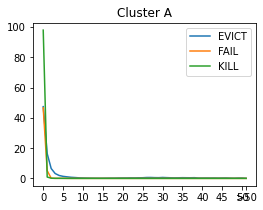

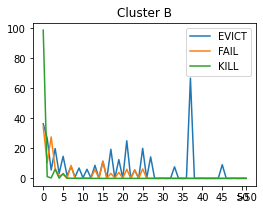

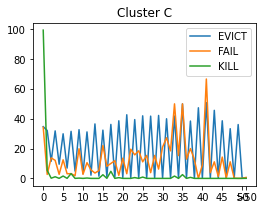

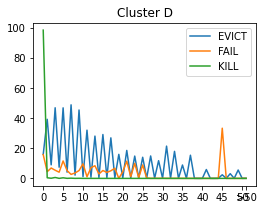

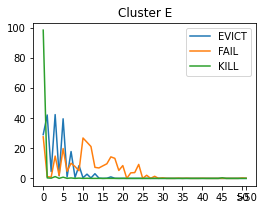

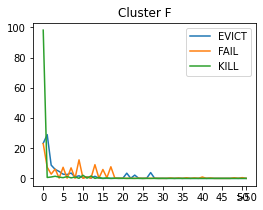

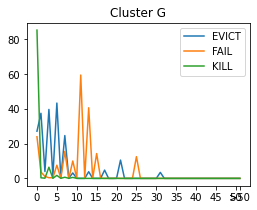

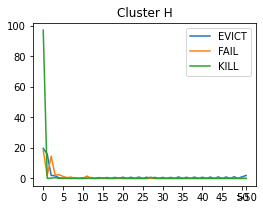

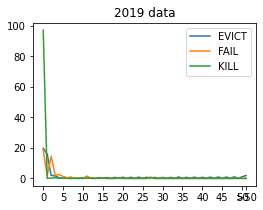

In [18]:
def figure_5_plot(df, cluster):
    dft = {}
    plt.figure(figsize=(4,3))
    for i in [4,5,7]:
        dft[i] = df[["count_" + str(i), "succ", "non"]].copy()
        dft[i] = dft[i].groupby("count_" + str(i)).sum().reset_index()
        
        over = dft[i][dft[i]["count_" + str(i)] > max_count].sum()
        if over["succ"] == 0 and over["non"] == 0:
            percover = 0
        else:
            percover = over["succ"] / (over["succ"] + over["non"])
        
        dft[i]["perc"] = dft[i]["succ"] / (dft[i]["succ"] + dft[i]["non"])
        dfi = dft[i]
        dft[i].loc[dfi["succ"].eq(0) & dfi["non"].eq(0), ["perc"]] = 0
        
        dft[i] = dft[i].drop(dft[i][dft[i]["count_" + str(i)] > max_count].index)
        #dft[i]["count_" + str(i)] = dft[i]["count_" + str(i)].astype(str)
        dft[i] = dft[i].append({"count_" + str(i): max_count + 1, "perc": percover}, ignore_index=True)

        del dft[i]["succ"]
        del dft[i]["non"]
        plt.xticks([0,5,10,15,20,25,30,35,40,45,50,51])
        
        ys = []
        for j in range(0, max_count + 2):
            a = dft[i][dft[i]["count_" + str(i)] == j]
            ys.append(0 if a.empty else a["perc"].squeeze() * 100)
     
        plt.plot([x if x < 51 else ">50" for x in range(0,52)], ys)
        if cluster == "all":
            plt.title("2019 data")
        elif cluster == "2011":
            plt.title("2011 data")
        else:
            plt.title("Cluster " + cluster.upper())
    lgd = plt.legend(["EVICT", "FAIL", "KILL"])
    plt.savefig('../report/figures/figure_5/figure-5-%s.pgf' % cluster, 
                bbox_extra_artists=(lgd,), bbox_inches='tight')

dftot = None
for cluster in "abcdefgh":
    df = pd.read_csv(glob.glob(DIR + "fig-5-" + cluster + ".csv/part-00000-*")[0], 
                     names=["count_4", "count_5", "count_7", "count_8", "succ", "non"])
    figure_5_plot(df, cluster)
    if dftot is None:
        dftot = df
    else:
        dftot = dftot.append(df)
    
dftot = dftot.groupby(["count_4", "count_5", "count_7", "count_8"]).sum().reset_index()
figure_5_plot(df, "all")